<a href="https://colab.research.google.com/github/RafkatDolkun/eda_project/blob/main/EDA_Notebook_Dolkun_Rafkat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Blog Link: https://medium.com/@dolkun/auction-car-sales-a-project-in-exploratory-data-analysis-a45ac87d7ff7

In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Reading the CSV file
dfCars = pd.read_csv("USA_cars_datasets.csv")
dfCars

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,2494,7800,nissan,versa,2019,clean vehicle,23609.0,red,3n1cn7ap9kl880319,167722715,california,usa,1 days left
2495,2495,9200,nissan,versa,2018,clean vehicle,34553.0,silver,3n1cn7ap5jl884088,167762225,florida,usa,21 hours left
2496,2496,9200,nissan,versa,2018,clean vehicle,31594.0,silver,3n1cn7ap9jl884191,167762226,florida,usa,21 hours left
2497,2497,9200,nissan,versa,2018,clean vehicle,32557.0,black,3n1cn7ap3jl883263,167762227,florida,usa,2 days left


In [5]:
# Figure out the rows and columns for the data frame
dfCars.shape

(2499, 13)

In [6]:
# Remove condition and unnamed
del dfCars['condition']
del dfCars['Unnamed: 0']

In [7]:
# What is the highest priced car being sold?
dfCars.loc[dfCars['price'].idxmax()]

price                         84900
brand                 mercedes-benz
model                      sl-class
year                           2017
title_status          clean vehicle
mileage                       25302
color                        silver
vin               wddjk7ea3hf044968
lot                       167607883
state                       florida
country                         usa
condition               2 days left
Name: 502, dtype: object

In [6]:
# The lowest price?
dfCars.loc[dfCars['price'].idxmin()]
# appears that the data set has values of 0 for prices

price                             0
brand                         dodge
model                           van
year                           2008
title_status      salvage insurance
mileage                      177948
color                        orange
vin               2d8hn44h88r669549
lot                       167756157
state                          utah
country                         usa
condition               2 days left
Name: 141, dtype: object

In [7]:
# What is the highest mileage car?
dfCars.loc[dfCars['mileage'].idxmax()]
# Interesting to see that it was a Peterbilt Semi Truck which was probably used for long hauls

price                          1025
brand                     peterbilt
model                         truck
year                           2010
title_status      salvage insurance
mileage                 1.01794e+06
color                        color:
vin               1xp7d49x0ad793710
lot                       167529842
state                       georgia
country                         usa
condition             17 hours left
Name: 528, dtype: object

In [8]:
# After discovering that the Semi Truck had the most miles, I wanted to see if the top mileage vehicles were similar
dfCars.sort_values(by=['mileage'],ascending=False).head(5)

# Discovered that there were more Peterbilt trucks with very high mileage

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
528,1025,peterbilt,truck,2010,salvage insurance,1017936.0,color:,1xp7d49x0ad793710,167529842,georgia,usa,17 hours left
1827,3200,ford,door,2013,clean vehicle,999999.0,silver,1fadp3k21dl266148,167727773,south carolina,usa,21 hours left
516,0,peterbilt,truck,2009,salvage insurance,982486.0,blue,1xp7d49x09d784257,167529788,florida,usa,17 hours left
490,475,peterbilt,truck,2012,salvage insurance,902041.0,gold,1xp4d49x9cd123630,167529786,florida,usa,17 hours left
531,2000,chevrolet,pickup,2003,clean vehicle,507985.0,red,1gcgc24u53z128586,167781223,wisconsin,usa,21 hours left


In [9]:
# How many Peterbilts are there?

peterbiltIndex = dfCars[dfCars['brand'] == 'peterbilt'].index
print(dfCars.loc[peterbiltIndex])

     price      brand  model  year  ...        lot    state country      condition
490    475  peterbilt  truck  2012  ...  167529786  florida     usa  17 hours left
504    100  peterbilt  truck  2012  ...  167529787  florida     usa  17 hours left
516      0  peterbilt  truck  2009  ...  167529788  florida     usa  17 hours left
528   1025  peterbilt  truck  2010  ...  167529842  georgia     usa  17 hours left

[4 rows x 12 columns]


In [10]:
# Lowest mileage?
dfCars.loc[dfCars['mileage'].idxmin()]
# Need to clean up data, it is showing a price and mileage of 0

price                             0
brand                     chevrolet
model                          door
year                           2004
title_status      salvage insurance
mileage                           0
color                        maroon
vin               3gnek12t74g240524
lot                       167418651
state                       wyoming
country                         usa
condition             18 hours left
Name: 309, dtype: object

In [11]:
# How many unique values for each column?
dfCars.nunique(axis=0)

price            790
brand             28
model            127
year              30
title_status       2
mileage         2439
color             49
vin             2495
lot             2495
state             44
country            2
condition         47
dtype: int64

In [12]:
# Why are there two countries?
dfCars['country'].value_counts()

# I thought this data base only had US car sales, but I was wrong
# I now discovered that there were 7 listings in Canada
# What were these listings?

 usa       2492
 canada       7
Name: country, dtype: int64

In [13]:
# When finding listings in Canada, I was getting an empty data frame
# checked the csv file to make it had no errors
# noticed 'canada' had a space before the c
print(dfCars[dfCars['country']=='canada'].index.values) # this gives me no index values

print(dfCars[dfCars['country']==' canada'].index.values) # adding the space shows the index values


[]
[261 813 814 815 816 817 818]


In [14]:
# Was able to use the code before to find all the Canada listings
canadaIndex = dfCars[dfCars['country']==' canada'].index
dfCars.loc[canadaIndex]

# another question emerged: index 813 - 817 were all Dodge Chargers being sold for the same price. Are these duplicates?
# I can use the VIN to check this
# The VIN shows that there are all different cars. In addition, they all have different mileages and lot numbers
# This reminded me to delete any duplicate VIN numbers just to be safe



,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
261,33000,chevrolet,1500,2018,clean vehicle,52521.0,white,3gcukreh0jg303596,167766786,ontario,canada,10 days left
813,30000,dodge,charger,2019,clean vehicle,43294.0,white,2c3cdxjg2kh630921,167766742,ontario,canada,10 days left
814,30000,dodge,charger,2019,clean vehicle,54309.0,orange,2c3cdxjg0kh682158,167766743,ontario,canada,10 days left
815,30000,dodge,charger,2019,clean vehicle,52822.0,white,2c3cdxjg2kh658962,167766751,ontario,canada,10 days left
816,30000,dodge,charger,2019,clean vehicle,45554.0,white,2c3cdxjg1kh630912,167766757,ontario,canada,10 days left
817,30000,dodge,charger,2019,clean vehicle,37538.0,white,2c3cdxjg1kh658953,167766758,ontario,canada,10 days left
818,29500,dodge,charger,2019,clean vehicle,35153.0,red,2c3cdxjg6kh630954,167766763,ontario,canada,10 days left


In [15]:
# dropping duplicate VIN numbers
dfCars.drop_duplicates(subset=['vin'])

# the number of rows went from 2499 to 2495, indicating that there were duplicate vin numbers

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
...,...,...,...,...,...,...,...,...,...,...,...,...
2494,7800,nissan,versa,2019,clean vehicle,23609.0,red,3n1cn7ap9kl880319,167722715,california,usa,1 days left
2495,9200,nissan,versa,2018,clean vehicle,34553.0,silver,3n1cn7ap5jl884088,167762225,florida,usa,21 hours left
2496,9200,nissan,versa,2018,clean vehicle,31594.0,silver,3n1cn7ap9jl884191,167762226,florida,usa,21 hours left
2497,9200,nissan,versa,2018,clean vehicle,32557.0,black,3n1cn7ap3jl883263,167762227,florida,usa,2 days left


In [16]:
# Are there more clean title or salvage title cars?
dfCars['title_status'].value_counts()

# I expected the website to include more salvage insurance cars, but my prediction was incorrect

clean vehicle        2336
salvage insurance     163
Name: title_status, dtype: int64

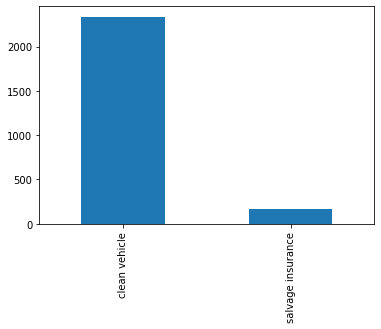

In [25]:
pd.value_counts(dfCars['title_status']).plot.bar()

In [17]:
# I will be deleting all cars with a price of 0
# Find the index of all the cars with a price of 0:
indexPrice = dfCars[dfCars['price'] == 0].index

# drop these cars:
dfCars.drop(indexPrice, inplace=True)

# test to see if code above worked:
dfCars.loc[dfCars['price'].idxmin()]

# no longer shows the minimum price to be 0

price                            25
brand                     chevrolet
model                        vehicl
year                           2020
title_status      salvage insurance
mileage                        7232
color                         black
vin               2gnaxkev6l6128374
lot                       167756877
state                      kentucky
country                         usa
condition               3 days left
Name: 206, dtype: object

In [18]:
# repeat steps above for mileage:
indexMileage = dfCars[dfCars['mileage'] == 0].index

# drop these cars:
dfCars.drop(indexMileage, inplace=True)

# test to see if code above worked:
dfCars.loc[dfCars['mileage'].idxmin()]

# no longer shows the minimum price to be 0

price                          4050
brand                     heartland
model                       pioneer
year                           2018
title_status          clean vehicle
mileage                           1
color                          gray
vin               5sfpb3326je365727
lot                       167265963
state                  pennsylvania
country                         usa
condition               7 days left
Name: 325, dtype: object

In [19]:
# The count of each car brand
dfCars['brand'].value_counts()

ford               1215
dodge               430
nissan              312
chevrolet           286
gmc                  40
jeep                 30
chrysler             18
bmw                  16
hyundai              15
infiniti             12
buick                12
kia                  12
honda                11
mercedes-benz        10
cadillac              9
land                  4
heartland             4
audi                  3
acura                 3
peterbilt             2
lexus                 2
toyota                1
ram                   1
harley-davidson       1
mazda                 1
lincoln               1
maserati              1
jaguar                1
Name: brand, dtype: int64

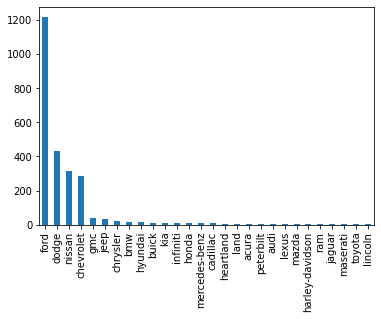

In [117]:
# Plotting the number of cars per brand listed
pd.value_counts(dfCars['brand']).plot.bar()

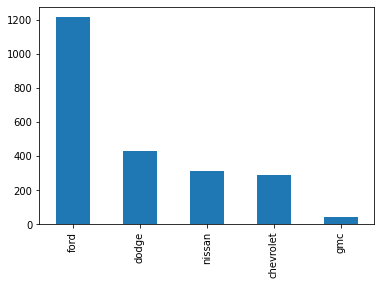

In [20]:
# Reduce the graph to only show the top 5 car brands with the most vehicles listed

pd.value_counts(dfCars['brand']).head().plot.bar()
# the graph shows that Ford has the most cars listed onto the website. Is this a bad thing? Issues with reliability?

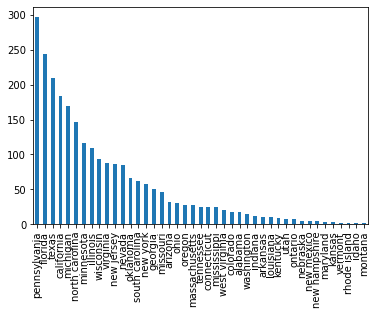

In [ ]:
# Which states had the most listings?
# Repeat steps above but replaced brand with state

# All states:
pd.value_counts(dfCars['state']).plot.bar()

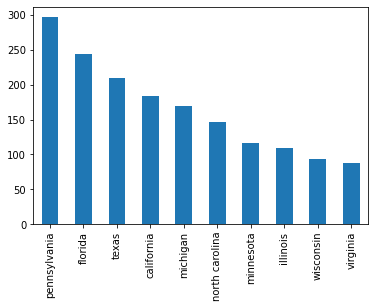

In [ ]:
# Top 10 states:
pd.value_counts(dfCars['state']).head(10).plot.bar()

# Pennsylvania had the most listings

In [ ]:
# Are more older or newer cars auctioned?
dfCars['year'].value_counts()
# More newer cars.

2019    892
2018    395
2017    375
2016    203
2015    196
2014    103
2013     84
2012     70
2020     48
2011     23
2008     13
2010     11
2007      6
2006      5
2009      5
2001      5
2003      5
2005      4
2004      3
1973      1
1999      1
2002      1
2000      1
1998      1
1994      1
1984      1
Name: year, dtype: int64

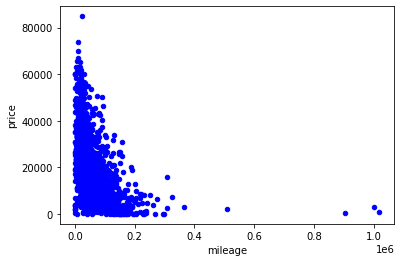

In [ ]:
dfCars.plot.scatter('mileage','price',c='blue')

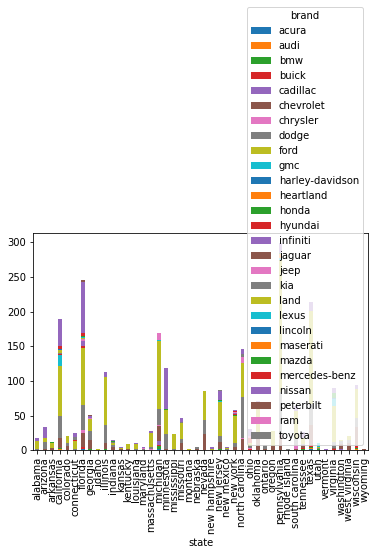

In [8]:
topStates = pd.value_counts(dfCars['state']).head()
topBrands = pd.value_counts(dfCars['brand']).head()

dfCars.groupby(['state','brand']).size().unstack().plot(kind='bar',stacked=True)
plt.show()



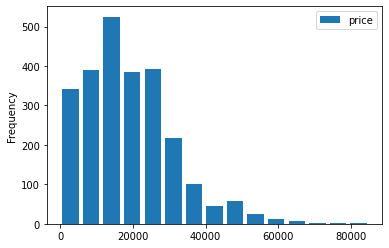

In [24]:
# distribution of the car prices
dfCars[['price']].plot(kind='hist', rwidth = 0.8,bins=15)

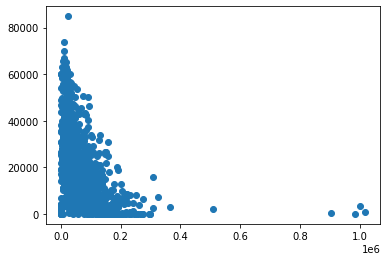

In [ ]:
# In this data set, is there a correlation between mileage and car price?
plt.scatter(dfCars.mileage, dfCars.price)
# This plot shows that in this case, there is no correlation. There are cars with low miles selling for various prices